<a href="https://colab.research.google.com/github/ashwinperti/FetchWeatherApp/blob/master/20210223_ATAL_FDP_RL_Taxi_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Reinforcement Learning<br><br>using OpenAI Gym Taxi Environment</center>

___

OpenAI is a non-profit research company founded by Elon Musk and Sam Altman, which works towards building economically valuable and highly autonomous systems.

OpenAI Gym ( https://gym.openai.com/ ) is a RL toolkit with many simulated environments. The Gym allows users to build their reinforcment learning muscle by applying various techniques with an objective to maximise the reward with minimum number of iterations.

#### Available Environments - https://github.com/openai/gym/blob/master/docs/environments.md

Although it is also possible to create your own environment using the Gym API - https://github.com/openai/gym/blob/master/docs/creating-environments.md. It is beyond the scope of this training.

___

### Getting Started

Install the library

In [1]:
# openai gym package
import gym

# import libraries to display the environment in jupyter notebook
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

# import library to pause execution for display
import time

# import library for data structure
from collections import defaultdict

# import library for numerical computation
import numpy as np

## Environment and Agent

There are two primary concepts in reinforcement learning : 

- the Environment

- the Agent

<img src="img/RL_env.png" />

Let us start with the <b> Gym Taxi</b> environment- https://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py.

- #### Environment : A 5x5 grid with 4 pick-up / drop-off locations and a passenger


    - There are four designated locations in the grid world indicated by R(ed), G(reen), Y(ellow), and B(lue). 
    - When the episode starts, the taxi starts off at a random square and the passenger is at a random location. 
    - The taxi drives to the passenger's location, picks up the passenger, drives to the passenger's destination (another one of the four specified locations), and then drops off the passenger. 

- #### Agent : A taxi cab

<img src="img/taxi_env.png" />

### Create an instance of the environment

In [ ]:
env = gym.make('Taxi-v3')

## Gym Taxi Env `Attributes`

___

### Environment Observation Space Object

In [ ]:
env.observation_space

Discrete(500)

The observation space for Gym Taxi Environment is `Discrete(500)`

As we know `Discrete` refers to distinct values so the observation space in this environment is denoted by a numeric code. The code range which is `500 = 5 x 5 x 5 x 4` includes 
- 5 x 5 = 25 distinct taxi locations

- 5 ( 4 + 1 ) passenger locations i.e. at one of the 4 ( R / G / B / Y ) tiles or in the taxi

    
        Passenger locations:
        - 0: R(ed)
        - 1: G(reen)
        - 2: Y(ellow)
        - 3: B(lue)
        - 4: in taxi

- 4 passenger pick-up / drop-off locations

        Destinations:
        - 0: R(ed)
        - 1: G(reen)
        - 2: Y(ellow)
        - 3: B(lue)

### Environment Action Space Object

In [ ]:
env.action_space

Discrete(6)

The observation space for Gym Taxi Environment is `Discrete(6)`

Again we know `Discrete` refers to distinct code values. The code range which is `6` includes 
    - 0: move south
    - 1: move north
    - 2: move east
    - 3: move west
    - 4: pickup passenger
    - 5: drop off passenger

<div class="alert alert-block alert-info">

## Environment Space Attributes

All environments have two special attributes : 
- observation_space
- action_space 

Both are defined by instances of classes of the gym.spaces modules. Included types are

- #### gym.spaces.Discrete

A space containing n discrete points. Each point is mapped to an integer from [0 ,n−1]
    
    eg. Discrete(10) 
    A space containing 10 items mapped to integers in [0,9] sample will return integers such as 0, 3, and 9
    
- #### gym.spaces.MultiDiscrete

A space containing k dimensions each with a separate number of discrete points. Each point in the space is represented by a vector of integers of length k.

    eg. MultiDiscrete([2, 2, 8]) 
    A space with k = 3 dimensions, containing 2, 2, 8 items each mapped to integers in [0,2], [0,2], [0,8] respectively. Sample will return integers such as (0, 2, 7)

- #### gym.spaces.Box

Used for multidimensional continuous spaces with bounds

    eg. Box(low = np.array((-1.0, -2.0)), high = np.array((1.0, 2.0))) 
    A 2D continous state space. 
    First dimension has values in range [−1.0,1.0) 
    Second dimension has values in range [−2.0,2.0). Sample will return a vector such as [−.55,2.] and [.768,−1.55]

- #### gym.spaces.MultiBinary

    
    eg. MultiBinary(10)
    
- #### gym.spaces.Tuple

    
    eg. Tuple([Discrete(5), Discrete(10)]),

- #### gym.spaces.Dict

    
    eg. Dict({"position": Discrete(5), "velocity": Box(low=np.array([0, 0]), high=np.array([1, 5]), dtype=np.float32)})

#### All instances have a sample method which will sample random instances within the space
    
</div>    

## Gym Taxi Env Methods

___

- ### reset( self ) : Reset the environment to a random initial state.

In [ ]:
env.reset()

228

- ### step( self, action ) : Observe the current state $S_t$ and take an action $A_t$. Returns 
    - next state $S_{t+1}$, 
    - reward $R_t+1$, 
    - done : boolean flag to indicate end of episode, 
    - info : additional info helpful for debugging.

In [ ]:
act = env.action_space.sample()
act

4

In [ ]:
env.step( act )

(228, -10, False, {'prob': 1.0})

<div class="alert alert-block alert-success"><h4><center>
    The environment presents an initial state ( observation ) $S_0$ and agent takes and action $A_0$ <br><br>
    The action take by the agent results in a new state $S_1$ and a reward $R_1$ <br><br>
    The process repeats ( $S_0$ $A_0$ $R_1$ $S_1$ $A_1$ $R_2$ $S_2$ $A_2$ ...... $R_N$ $S_N$ $A_N$) until the episode ends
</center></h4></div>

- ### render( self, mode = 'human' ) : Render one frame of the environment. 

    The default mode will do something human friendly, such as pop up a window.
    
    
    - blue: passenger
    - magenta: destination
    - yellow: empty taxi
    - green: full taxi
    - other letters (R, G, Y and B): locations for passengers and destinations

In [ ]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)


#### Let us write a loop to observe this environment perform a 25 steps

In [ ]:
# initial state
env.reset()

# loop for agent to take 25 steps
for i in range(50):

    env.step( env.action_space.sample() )
    time.sleep(0.1)
    display.clear_output(wait=True)
    env.render()

    print("Timestep", i)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
Timestep 49


<div class="alert alert-block alert-success"><center>
    <b>The mapping from state to action is called policy.</b><br><br>
    The main objective of the agent is to learn an optimal policy i.e. which action is best for any given state.<br><br>
    $\pi (a | s) = P( {A_t} | {S_t} )$<br><br>
    Initially the agent has many options for ( state, action ) pair and no understanding of a good or bad option, so there is an equal probabilty for the agent to choose any action.<br><br>
    $\pi (a | s) = 1/N$ for all $s \in S, a \in A $<br><br>
</center></div>

It is good to note here that in a lot of real world scenarios, especially when working with robotic machines, the next state for an action might not be deterministic. For eg. if a robotic agent takes action left, there is a small chance, that because of some internal or external circumstances, it ends up moving in a direction other than left.

This probability in Markov Decision Process ( MDP ) framework is called <b>the one-step dynamics of environment</b>

<center>
    $p( s', r | s, a ) = P( {S_{t+1}} = s', {R_{t+1}} = r | {S_t} = s, {A_t} = a)$ for all s', s, a, r
</center>

The agent is not aware of this probability so when it learns a good policy it has to learn to take into account this proability also, which it does because the reward for every state transition is different.

## Reward

The reward strategy designed for the Taxi Environment is :

- Agent receives +20 points for a successful dropoff
- Agent loses 1 point for every timestep it takes
- Agent gets a 10 point penalty for illegal pick-up and drop-off actions.

EPISODE TERMINATION : On successful passenger drop off or if the agent finishes 200 steps, the episode ends.

<div class="alert alert-block alert-success"><center>
    Reward is the the component of the RL framework which the agent is unaware and uses to improve its policy. <br><br>
    This also means that for a good RL framework, the reward strategy is very important. <b>The agent cannot just rely on the immediate reward</b> because a reward maybe good or bad in present step but have an opposite impact in the longer run. <br><br>
    <b>At every timestep, all previous states, actions and rewards are of no significance to the agent.</b>The agent picks and action to maximise future reward.<br><br>
    So rather than maximising the immediate reward, <b>the agent needs to maximise the overall cumalative reward. This is called Return ${G_t}$</b><br><br>
    Return $ = {R_{t+1}} + {R_{t+2}} + ... $<br><br>
    
</center></div>    
    
Important points about Taxi Env Rewards :<br>
    
- A success gets high reward of +20
- Every step gets -1 so that agent learns to not make any unecessary steps
- Gets heavy punishment of -10 for wrong pick-up and drop-off actions    

In [ ]:
cumalative_reward = 0
timestep = 0
done = False

env.reset()

while not done:

    _, reward, done, _ = env.step( env.action_space.sample() )
    cumalative_reward += reward
    
    time.sleep(0.1)
    display.clear_output(wait=True)
    env.render()

    timestep += 1
    print("Timestep", timestep)
    print("Reward", cumalative_reward)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Timestep 200
Reward -749


### Discounted Return

Agent has a better idea of latest reward as compared to a reward that it might receive way ahead in the future. So, it is useful to give more weightage to the more recent rewards and slowly reduce the weight over the next timesteps.

<div class="alert alert-block alert-success"><center>
    This is called <b>Discounted Return</b>, or often simply Return.<br><br>
    ${G_t} = {R_{t+1}} + \gamma{R_{t+2}} + \gamma^2{R_{t+3}} + \gamma^3{R_{t+4}} + ... = \sum \gamma^k{R_{t+k+1}}$<br><br>
    If $\gamma = 1$, it implies no discount and all future rewards are considered <br><br>
    If $\gamma = 0$, it implies only immediate reward is considered <br><br>
    As $\gamma$ reduces, agent is relying more on the recent rewards. Usually, 0.9 is a good value to start.
</center></div>    

Let's compute the discounted return for the ( state, action ) pair at first timestep. 

In [ ]:
timestep = 0
done = False
gamma = 0.9

s_list = []
a_list = []
r_list = []

env.reset()

while not done:

    action = env.action_space.sample()
    state, reward, done, _ = env.step( action )
    
    a_list.append(action)
    s_list.append(state)
    r_list.append(reward)
    
    time.sleep(0.1)
    display.clear_output(wait=True)
    env.render()

    timestep += 1
    print("Timestep", timestep)

discounts = np.array([gamma**i for i in range(timestep)])

print("Reward for State : %s and Action %s is %f" % (s_list[0], a_list[0], sum(discounts * r_list)))
print("Reward for State : %s and Action %s is %f" % (s_list[1], a_list[1], sum(discounts[:-1] * r_list[1:])))
print("Reward for State : %s and Action %s is %f" % (s_list[2], a_list[2], sum(discounts[:-2] * r_list[2:])))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| :_|B: |
+---------+
  (Dropoff)
Timestep 200
Reward for State : 72 and Action 1 is -46.534810
Reward for State : 72 and Action 4 is -50.594233
Reward for State : 72 and Action 5 is -45.104704


As you would expect, the return can be computed only once the episode ends.

<div class="alert alert-block alert-success"><center>
For each state $s$, the <b>State-Value function</b> yields the expected return if the agent is in state $s$ and follows the policy $\pi$ for all timesteps.<br><br>
$\nu_\pi (s) = E_\pi [ G_t | S_t = s]$<br><br>
This can also be written as<br><br>
$\nu_\pi (s) = E_\pi [ R_{t+1} + \gamma\nu_\pi(s_{t+1}) | S_t = s]$<br><br>    
As there are many possible actions for the agent in each state.
For each state $s$ and action $a$, the <b>Action-Value function</b> yields the expected return if the agent is in state $s$, takes action $a$ and follows the policy $\pi$ for all the timesteps<br><br>
$q_\pi (s, a) = E_\pi [ G_t | S_t = s, A_t = a]$<br><br>These are also called the <b>Bellman Expectation Equations</b><br><br>
</div></center>

    
Now we can understand that for the agent to learn the return for each ( s, a ) it needs to see the pair many times i.e. it needs many episodes ( or iterations ). So let's define the steps :
- Pick a policy $\pi$, which initially can be the random policy
    - Collect lots of episodes
    - Update the Q-table with new $q$ values. We can average all values.
    - Repeat

This is called the <b>Monte Carlo Prediction</b> Method. Let us combine all these concepts and see the result.


### Monte Carlo Prediction 

In [ ]:
def generate_episode() :
    
    episode = []
    done = False
    state = env.reset()
    
    while not done:
        
        action = env.action_space.sample()
        new_state, reward, done, _ = env.step( action )
        
        episode.append( ( state, action, reward ) )
        state = new_state
    
    return episode


<div class="alert alert-block alert-success"><center>
    We are updating the Q formula as follows : <br><br>
    $q( s_t, a_t ) = \frac{ (N(s_t, a_t)\ -\ 1)q( s_t, a_t )\ +\ g( s_t, a_t )}{N(s_t, a_t)} = q( s_t, a_t ) -\frac{ q( s_t, a_t )}{N(s_t, a_t)} + \frac{g( s_t, a_t )}{N(s_t, a_t)} = q( s_t, a_t ) +\frac{ g( s_t, a_t )\ -\ q( s_t, a_t )}{N(s_t, a_t)}$<br><br>
    </div></center>

In [ ]:
num_episodes = 200
gamma = 0.9

N = defaultdict(lambda: np.zeros(env.action_space.n))
Q = defaultdict(lambda: np.zeros(env.action_space.n))

for i in range( num_episodes ):
    
    # generate an episode
    episode = generate_episode()
    
    # create the states, actions, and rewards
    states, actions, rewards = zip(*episode)
    
    # create discounts array
    discounts = np.array([gamma**i for i in range( len(episode) + 1)])
    
    # update the sum of the returns, number of visits, and action-value 
    for i, state in enumerate(states) :
        
        G_t = sum( discounts[:-(1+i)] * rewards[i:] )
        N[state][actions[i]] += 1.0
        Q[state][actions[i]] += (G_t - Q[state][actions[i]]) / N[state][actions[i]]
        
Q        

defaultdict(<function __main__.<lambda>>,
            {1: array([-32.86481911, -24.48802451, -34.32586806, -34.52094037,
                    -30.3250689 , -39.81601709]),
             2: array([-31.32186497, -31.75219743, -33.90600185, -31.09990652,
                    -26.26907393, -42.57798325]),
             3: array([-36.41589936, -29.6920872 , -30.83900003, -29.51105635,
                    -30.29423071, -39.45638304]),
             4: array([-35.83609484, -38.48444499, -36.02965449, -37.82890454,
                    -46.43412932, -45.85613397]),
             6: array([-35.37634622, -35.55285307, -37.86121021, -32.72064853,
                    -42.40943532, -44.64248081]),
             7: array([-34.25464192, -35.83858764, -39.0404361 , -37.18775497,
                    -49.09745218, -47.38759757]),
             8: array([-33.38436406, -35.92186368, -33.52945059, -34.18172502,
                    -38.07281977, -42.4253777 ]),
             9: array([-33.67764432, -39.89265994, -35.

<div class="alert alert-block alert-success"><center>
    The goal of the agent in any environment is to find the <br><h2>Optimal Policy $\pi_*$</h2><br><br>
    A policy $\pi'$ is better than or equal to any other policy $\pi$, if its state-value function is greater than or equal to that of the policy $\pi$ for all states.<br><br>
$\pi' \geq \pi$ if and only if $\nu_\pi' (s) \geq \nu_\pi$ for all $s \in S$<br><br>
    If state and action space are finite, the <b>Optimal Action Value Funtion $q_*$</b> can be represented in a table with all possible s and a. This is called <b>The Q-table</b>.<br><br>
    $\pi_* (s) = {argmax}_{a \in A} q_*( s, a)$ for all $s \in S$, and<br><br>
    $\nu_* (s) = {max}_{a \in A} q_*( s, a)$ for all $s \in S$<br><br>    
    <b>An optimal policy $\pi_*$ satisfies $\pi_* \geq \pi$ for all $\pi$. It is guaranteed to exist but may not be unique.</b>
</div></center>


<div class="alert alert-block alert-success"><center>
    MC Prediction Method provides a way for <b>Policy Evaluation</b>. The next step is to find a better policy to replace this policy which is called the <b>Policy Improvement</b>. This is given by the <b>Monte Carlo Control</b> Method.<br><br>
    The question then is - how do we update our random policy ? <br> One obvious approach is to update it with the <b>Greedy Policy</b> which means <b>the agent in state $s$ always picks the action with the maximum expected return.</b><br><br>
    Based on our intuition, we can say this is good if the agent is starting with a good policy which is never the case, so if the agent always <b>exploits</b> its past knowledge then it will not try many of the possible actions. It also needs to <b> explore</b> new actions.<br>
    This concept is called <b>Exploration and Exploitation</b> and is implemented by introducing another hyperparameter $\epsilon$ and therefore the new policy is called $\epsilon$-greedy policy.<br><br>
    <img src="img/epsilon.png" width = "300" /><br><br>
    If $\epsilon = 1$, only exploration <br><br>
    If $\epsilon = 0$, only exploitation <br><br>
    As $\epsilon$ reduces, the agent tends to move from exploration towards exploitation.<br><br>
    $\pi (a | s) \gets \begin{cases}1 - \epsilon + \frac{\epsilon}{|A(s)|} & \text{if a maximises q(s, a )}\\ \frac{\epsilon}{|A(s)|} & \text{else} \end{cases}$<br><br>
    The formula ensure that sum of all probabilities is 1.<br><br>
</div></center>

- Pick a policy $\pi$, which initially can be the random policy
    - Collect lots of episodes
    - Update the Q-table with new $q$ values. 
    - Update the policy $\pi$ with a better $\epsilon$-greedy policy $\pi'$
    - Repeat

This is called the <b>Monte Carlo Control Method</b> Let us combine all these concepts and see the result.


In [ ]:
def get_policyS(Q_s, nA, epsilon) :
    
    # initialise probability
    policy_s = np.ones(nA) * (epsilon / nA)
    
    # update probability for greedy action for state s
    greedy_s = np.argmax(Q_s)
    policy_s[greedy_s] += 1 - epsilon 
    
    return policy_s

While implementing MC Control, we will include two other improvements to the algorithm.

<div class="alert alert-block alert-success"><center>
    <b>INCREMENTAL MEAN</b> : Rather than updating the policy after some fixed number of episodes, we will update it after every policy.<br><br>
    <b>CONSTANT-$\alpha$</b> : As the factor $\frac{1}{N}$ will become very small as the number of episodes increase, the update to the Q-table will not happen. So we can replace it with another hyperparameter $\alpha$, also called the learning rate.<br><br> 
    So we get, $q( s_t, a_t ) = q( s_t, a_t ) +\ \alpha\ (g( s_t, a_t )\ -\ q( s_t, a_t ))$<br><br>
    If $\alpha = 1$, only latest return is considered <br><br>
    If $\alpha = 0$, no update is made <br><br>
    As $\alpha$ reduces, the agent tends to rely more on the historical $q$ value.<br><br>
</div></center>   

## Monte Carlo Control

In [ ]:
def generate_epsgreedy_episode(env, Q, epsilon, nA):
    
    episode = []
    state = env.reset()
    done = False
    
    while not done :
        
        # update policy
        policy_s = get_policyS(Q[state], nA, epsilon)
        
        # pick action from epsilon-greedy policy
        action = np.random.choice(np.arange(nA), p = policy_s if state in Q else env.action_space.sample())
        
        next_state, reward, done, _ = env.step(action)
        
        episode.append((state, action, reward))
        state = next_state

    return episode

<div class="alert alert-block alert-success"><center>
    In order to guarantee that MC Control converges to the $\pi_*$, we need to ensure that these 2 conditions are met.<br><br>
    EXPLORATION : Every ( state, action ) pair is visited infinitely many times i.e. $\epsilon_i > 0$.<br><br>
    EXPLOITATION : The policy converges to a policy that is greedy w.r.t the q i.e. ${lim}_{i \to \infty}\epsilon_i$.<br><br>
    Therfore, the agent needs to <b>explore</b> the environment for sometime, and slowly as it makes more interactions, it can be confident to have learnt better $q$ values and begin to <b>exploit</b> past knowledge.<br><br>
    Thus, the agent uses a <b>Epsilon Decay Rate</b> <br><br>
<img src="img/epsilon_rate.png" width = "400" /><br><br>
    $\epsilon_i$ getting too small to early can lead to agent settling for a sub-optimal policy. While $\epsilon_i$ taking too long to reduce can lead the agent to take to long before it can converge to optimal policy.
    
</div></center>


In [ ]:
num_episodes = 200

# discount rate
gamma = 0.9

# epsilon rate parameters
eps_start = 1.0
eps_decay = .99999
eps_min = 0.05
epsilon = eps_start

# learning rate
alpha = 0.02

nA = env.action_space.n
Q = defaultdict(lambda: np.zeros(nA))

for i in range(num_episodes):

    # set epsilon
    epsilon = max( epsilon * eps_decay, eps_min )
    
    # generate episode
    episode = generate_epsgreedy_episode(env, Q, epsilon, nA)
    states, actions, rewards = zip(*episode)
    
    # prepare for discounting
    discounts = np.array([gamma**i for i in range(len(rewards)+1)])
    
    # UPDATE Q-TABLE
    for i, state in enumerate(states):
        
        Q[state][actions[i]] += alpha * ( sum(rewards[i:] * discounts[:-(1+i)] ) - Q[state][actions[i]] )
    
# determine the policy corresponding to the final action-value function estimate
policy = dict((k,np.argmax(v)) for k, v in Q.items())    
policy

{1: 3,
 2: 4,
 3: 2,
 4: 1,
 6: 2,
 7: 3,
 8: 3,
 9: 5,
 11: 2,
 12: 1,
 13: 1,
 14: 1,
 16: 5,
 17: 5,
 18: 1,
 19: 4,
 21: 3,
 22: 3,
 23: 0,
 24: 3,
 26: 2,
 27: 2,
 28: 3,
 29: 0,
 31: 1,
 32: 3,
 33: 1,
 34: 3,
 36: 1,
 37: 0,
 38: 3,
 39: 3,
 41: 3,
 42: 4,
 43: 1,
 44: 3,
 46: 3,
 47: 3,
 48: 3,
 49: 2,
 51: 0,
 52: 5,
 53: 0,
 54: 3,
 56: 1,
 57: 2,
 58: 3,
 59: 1,
 61: 1,
 62: 0,
 63: 3,
 64: 0,
 66: 3,
 67: 2,
 68: 2,
 69: 3,
 71: 1,
 72: 3,
 73: 2,
 74: 2,
 76: 0,
 77: 0,
 78: 5,
 79: 1,
 81: 5,
 82: 2,
 83: 2,
 84: 0,
 86: 2,
 87: 4,
 88: 2,
 89: 0,
 91: 2,
 92: 2,
 93: 2,
 94: 0,
 96: 3,
 97: 5,
 98: 2,
 99: 0,
 101: 3,
 102: 4,
 103: 2,
 104: 4,
 106: 1,
 107: 3,
 108: 0,
 109: 3,
 111: 5,
 112: 2,
 113: 2,
 114: 3,
 116: 0,
 117: 2,
 118: 1,
 119: 1,
 121: 0,
 122: 2,
 123: 2,
 124: 3,
 126: 5,
 127: 3,
 128: 0,
 129: 3,
 131: 1,
 132: 1,
 133: 2,
 134: 3,
 136: 1,
 137: 2,
 138: 0,
 139: 3,
 141: 1,
 142: 3,
 143: 1,
 144: 2,
 146: 2,
 147: 0,
 148: 0,
 149: 0,
 151: 1,

## Temporal Difference Methods

While MC methods set a good context for the advanced algorithms, they are not very useful in real world use cases. The main reason is that it requires the agent to update its action-value function only after the episode finishes.

The more popular approaches are Temporal Difference Methods, in which the agent updates the Q-table and picks a new policy, at each timestep.

In [ ]:
import math

def test_agent(Q) :
    random_noofepisodes = 10
    total_rewards_list = []

    steps_per_episode_qa = []

    for episode in range(random_noofepisodes):
        state = env.reset()
        episode_rewards = []
        done = False
        total_rewards = 0
        step = 0

        while(not done):

            action = np.argmax(Q[state]) # Choose best action (Q-table)
            state, reward, done, info = env.step(action) # Take action
            total_rewards += reward  # Summing rewards
            step += 1

            # Display it
            time.sleep(0.05)
            display.clear_output(wait=True)
            env.render()
            print('Epsiode = ', episode+1)
            print('Step = ', step)
            print('State = ', state)
            print('Step Reward = ', reward)

        print('Episode Reward = ', total_rewards)
        total_rewards_list.append(total_rewards)
        steps_per_episode_qa.append(step)

    env.close()

    print(f"Average no of steps per epsiode for Random Agent = {np.mean(steps_per_episode_qa)}")
    print(f"Average reward per epsiode for Random Agent = {np.mean(total_rewards_list)}")

    plt.plot(list(range(random_noofepisodes)), total_rewards_list)
    plt.xlabel('Episodes')
    plt.ylabel('Rewards per Episode')   
    
def display_plots(num_episodes, total_reward_list, eps_list) :
    
    plt.subplots(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(list(range(num_episodes)), total_reward_list)
    plt.xlabel('Episodes')
    plt.ylabel('Rewards per Episode')

    plt.subplot(1, 2, 2)
    plt.plot(list(range(num_episodes)), eps_list)
    plt.xlabel('Episodes')
    plt.ylabel('Epsilon')

### SARSA

In [ ]:
num_episodes = 4000
nA = env.action_space.n
Q_sarsa = defaultdict(lambda: np.zeros(env.nA))

# decay parameter
decay_param = 300

# learning rate
alpha = 0.3

eps_list = []
total_reward_sarsa_list = []

for i in range(num_episodes) :
        
    done = False
    state = env.reset()
    
    epsilon = max(0.1, min( 1.0, 1.0 - math.log10((i + 1) / decay_param )))
    policy_s = get_policyS( Q_sarsa[state], nA, epsilon )
    action = np.random.choice( np.arange(nA), p = policy_s if state in Q_sarsa else env.action_space.sample() )

    eps_list.append(epsilon)
    r_list = []
    
    while not done :
        
        # next state
        next_state, reward, done, _ = env.step(action)
        r_list.append(reward)
        
        # next action
        policy_s = get_policyS(Q_sarsa[next_state], nA, max(epsilon * eps_decay, eps_min) )
        next_action = np.random.choice( np.arange(nA), p = policy_s if next_state in Q_sarsa else env.action_space.sample() )
        
        Q_sarsa[state][action] += alpha * (reward + gamma * Q_sarsa[next_state][next_action] - Q_sarsa[state][action])
        state = next_state
        action = next_action
        
    total_reward_sarsa_list.append(sum(r_list))
    

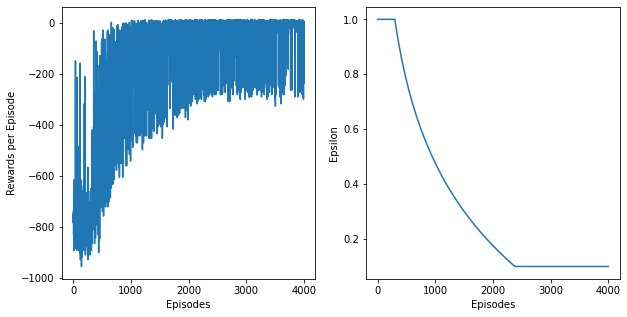

In [ ]:
display_plots(num_episodes, total_reward_sarsa_list, eps_list)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Epsiode =  10
Step =  7
State =  0
Step Reward =  20
Episode Reward =  14
Average no of steps per epsiode for Random Agent = 12.7
Average reward per epsiode for Random Agent = 8.3


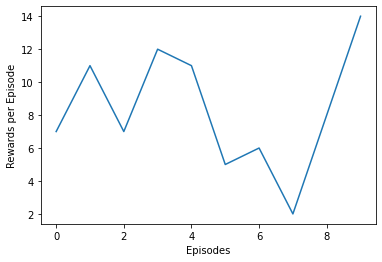

In [ ]:
test_agent(Q_sarsa)

### SARSAmax ( aka Q-Learning )

In [ ]:
num_episodes = 1000
nA = env.action_space.n
Q_sarsamax = defaultdict(lambda: np.zeros(env.nA))

# decay parameter
decay_param = 100

# learning rate
alpha = 0.3

eps_list = []
total_reward_sarsamax_list = []

for i in range(num_episodes) :
        
    done = False
    state = env.reset()

    epsilon = max(0.1, min( 1.0, 1.0 - math.log10((i + 1) / decay_param )))
    eps_list.append(epsilon)
    r_list = []
    
    while not done :
        
        policy_s = get_policyS( Q_sarsamax[state], nA, epsilon )
        action = np.random.choice( np.arange(nA), p = policy_s if state in Q_sarsamax else env.action_space.sample() )
    
        # next state
        next_state, reward, done, _ = env.step(action)
        r_list.append(reward)
        
        Q_sarsamax[state][action] += alpha * (reward + gamma * max(Q_sarsamax[next_state]) - Q_sarsamax[state][action])
        state = next_state
        action = next_action
        
    total_reward_sarsamax_list.append(sum(r_list))
     

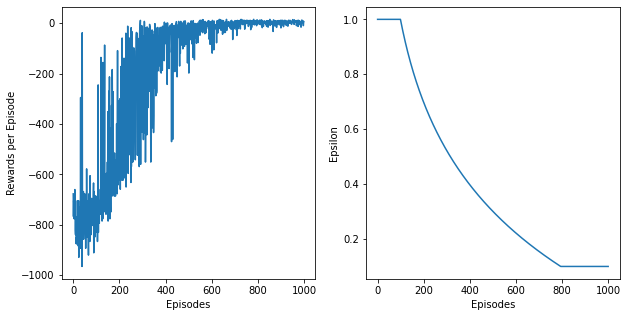

In [ ]:
display_plots(num_episodes, total_reward_sarsamax_list, eps_list)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Epsiode =  10
Step =  10
State =  410
Step Reward =  20
Episode Reward =  11
Average no of steps per epsiode for Random Agent = 10.6
Average reward per epsiode for Random Agent = 10.4


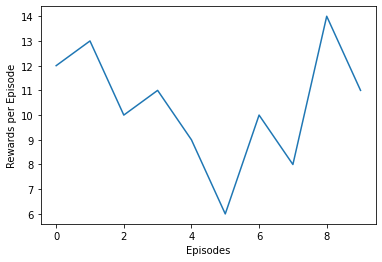

In [ ]:
test_agent(Q_sarsamax)